# Check pmo gene counts
- KO analysis was done by Wyatt elsewhere
- Here check pmoABC as per ISME reviewer comment

In [12]:
# Setup
suppressMessages(library(tidyverse))

## Normalized counts

In [45]:
# Import data
ko_table <- read.delim("../data/shotgun/MG_RAST_data/RAST_KO_ordered133_R2_F200_DESeq2_nrm.txt") %>%
    column_to_rownames(var = "KO") %>%
    t() %>%
    as.data.frame()   
dim(ko_table)
rownames(ko_table)
colnames(ko_table)
head(ko_table)
tail(ko_table)

[1]  133 4029

[1] "Sandmound_TuleA_D1"       "Sandmound_TuleA_D2"      
  [3] "Sandmound_TuleB_D1"       "Sandmound_TuleB_D2"      
  [5] "Sandmound_TuleC_D1"       "Sandmound_TuleC_D2"      
  [7] "Sandmound_ThreeSqA_D1_rd" "Sandmound_ThreeSqA_D2"   
  [9] "Sandmound_ThreeSqB_D1"    "Sandmound_ThreeSqB_D2"   
 [11] "Sandmound_ThreeSqC_D1"    "Sandmound_ThreeSqC_D2"   
 [13] "WestPond_TuleA_D2"        "WestPond_TuleB_D1"       
 [15] "WestPond_TuleB_D2"        "WestPond_TuleC_D1"       
 [17] "WestPond_TuleC_D2"        "WestPond_CattailA_D1"    
 [19] "WestPond_CattailA_D2"     "WestPond_CattailB_D1"    
 [21] "WestPond_CattailC_D2"     "WestPond_TuleA_D1"       
 [23] "MayberryNE_TuleA_D1"      "MayberryNE_TuleA_D2"     
 [25] "MayberryNE_TuleB_D1"      "MayberryNE_TuleB_D2"     
 [27] "MayberryNE_TuleC_D1"      "MayberryNE_TuleC_D2"     
 [29] "MayberryNE_CattailA_D1"   "MayberryNE_CattailA_D2"  
 [31] "MayberryNE_CattailB_D1"   "MayberryNE_CattailB_D2"  
 [33] "MayberryNE_CattailC_D1"   "MayberryNE_CattailC_D2"  
 [35] "MayberrySE_CattailA_D1"   "MayberrySE_CattailA_D2"  
 [37] "MayberrySE_CattailB_D1"   "MayberrySE_TuleA_D1"     
 [39] "MayberryNW_TuleA_D1"      "MayberryNW_TuleA_D2"     
 [41] "MayberryNW_TuleB_D1"      "MayberryNW_TuleB_D2"     
 [43] "MayberryNW_TuleC_D1"      "MayberryNW_TuleC_D2"     
 [45] "MayberryNW_CattailA_D1"   "MayberryNW_CattailA_D2"  
 [47] "MayberryNW_CattailB_D1"   "MayberryNW_CattailB_D2"  
 [49] "MayberryNW_CattailC_D1"   "MayberryNW_CattailC_D2"  
 [51] "Browns_TuleA_D1"          "Browns_TuleA_D2"         
 [53] "Browns_TuleB_D1"          "Browns_TuleB_D2"         
 [55] "Browns_TuleC_D1"          "Browns_ThreeSqA_D1"      
 [57] "Browns_ThreeSqA_D2"       "Browns_ThreeSqB_D1"      
 [59] "Browns_ThreeSqB_D2"       "Browns_ThreeSqC_D1"      
 [61] "Browns_ThreeSqC_D2"       "RushSE_TuleA_D1"         
 [63] "RushSE_TuleA_D2"          "RushSE_TuleB_D1"         
 [65] "RushSE_TuleB_D2"          "RushSE_TuleC_D1"         
 [67] "RushSE_CattailNLA_D1"     "RushSE_CattailNLA_D2"    
 [69] "RushSE_CattailNLB_D1"     "RushSE_CattailNLB_D2"    
 [71] "RushSE_CattailNLC_D1"     "RushSE_CattailNLC_D2"    
 [73] "RushMan_CattailNLA_D2"    "RushMan_CattailNLB_D2"   
 [75] "RushMan_CattailNLC_D1"    "RushMan_CattailNLC_D2"   
 [77] "RushMan_ThreeSqA_D1"      "RushMan_ThreeSqA_D2"     
 [79] "RushMan_ThreeSqB_D1"      "RushMan_ThreeSqB_D2"     
 [81] "RushMan_ThreeSqC_D2"      "RushOxbow_ThreeSqA_D1"   
 [83] "RushOxbow_ThreeSqA_D2"    "RushOxbow_ThreeSqB_D1"   
 [85] "RushOxbow_ThreeSqB_D2"    "RushOxbow_ThreeSqC_D1"   
 [87] "RushOxbow_ThreeSqC_D2"    "Joice_CattailNLA_D1"     
 [89] "Joice_CattailNLA_D2"      "Joice_CattailNLB_D1"     
 [91] "Joice_CattailNLB_D2"      "Joice_CattailNLC_D1"     
 [93] "Joice_CattailNLC_D2"      "Joice_ThreeSqA_D1"       
 [95] "Joice_ThreeSqA_D1_rd"     "Joice_ThreeSqA_D2"       
 [97] "Joice_ThreeSqA_D2_rd"     "Joice_ThreeSqB_D1"       
 [99] "Joice_ThreeSqC_D1"        "Joice_ThreeSqC_D2"       
[101] "Goodyear_PhragA_D2"       "Goodyear_PhragC_D2"      
[103] "White_CordA_D2"           "White_CordB_D2"          
[105] "White_ThreeSqA_D1"        "White_ThreeSqA_D2"       
[107] "White_ThreeSqB_D1"        "White_ThreeSqB_D2"       
[109] "White_ThreeSqC_D1"        "White_ThreeSqC_D2"       
[111] "Tolay_CordA_D2"           "Tolay_CordB_D2"          
[113] "Tolay_CordC_D2"           "China_Galinas_CordA_D2"  
[115] "China_Galinas_CordB_D2"   "China_Galinas_CordC_D2"  
[117] "China_Galinas_PWA_D1"     "China_Galinas_PWA_D2"    
[119] "China_Galinas_PWB_D1"     "China_Galinas_PWB_D2"    
[121] "China_Galinas_PWC_D1"     "China_Bullhead_CordA_D2" 
[123] "China_Bullhead_CordB_D2"  "China_Bullhead_CordC_D2" 
[125] "China_Galinas_PWC_D2"     "Muzzi_CordA_D2"          
[127] "Muzzi_CordB_D2"           "Muzzi_CordC_D2"          
[129] "Muzzi_PWA_D1"             "Muzzi_PWB_D1"            
[131] "Muzzi_PWB_D2"             "Muzzi_PWC_D1"            
[133] "Muzzi_PWC_D2"

[1] "K00001" "K00002" "K00003" "K00004" "K00005" "K00007" "K00008" "K00009"
   [9] "K00010" "K00011" "K00012" "K00013" "K00014" "K00015" "K00016" "K00018"
  [17] "K00019" "K00020" "K00021" "K00022" "K00023" "K00024" "K00025" "K00026"
  [25] "K00027" "K00028" "K00029" "K00030" "K00031" "K00032" "K00033" "K00034"
  [33] "K00035" "K00036" "K00037" "K00038" "K00039" "K00040" "K00041" "K00042"
  [41] "K00043" "K00044" "K00045" "K00048" "K00049" "K00050" "K00051" "K00052"
  [49] "K00053" "K00054" "K00055" "K00057" "K00058" "K00059" "K00060" "K00061"
  [57] "K00064" "K00065" "K00066" "K00067" "K00068" "K00071" "K00073" "K00074"
  [65] "K00075" "K00077" "K00078" "K00079" "K00082" "K00083" "K00086" "K00087"
  [73] "K00088" "K00090" "K00091" "K00094" "K00097" "K00099" "K00100" "K00101"
  [81] "K00102" "K00103" "K00104" "K00105" "K00106" "K00108" "K00109" "K00111"
  [89] "K00112" "K00113" "K00114" "K00115" "K00116" "K00117" "K00119" "K00120"
  [97] "K00121" "K00122" "K00123" "K00124" "K00125" "K00126" "K00127" "K00128"
 [105] "K00129" "K00130" "K00131" "K00132" "K00133" "K00134" "K00135" "K00136"
 [113] "K00137" "K00139" "K00140" "K00141" "K00143" "K00145" "K00146" "K00147"
 [121] "K00148" "K00149" "K00150" "K00151" "K00155" "K00156" "K00157" "K00158"
 [129] "K00161" "K00162" "K00163" "K00164" "K00166" "K00167" "K00169" "K00170"
 [137] "K00171" "K00172" "K00174" "K00175" "K00176" "K00177" "K00186" "K00187"
 [145] "K00188" "K00189" "K00190" "K00192" "K00193" "K00194" "K00195" "K00196"
 [153] "K00197" "K00198" "K00200" "K00201" "K00202" "K00203" "K00205" "K00206"
 [161] "K00207" "K00208" "K00210" "K00213" "K00214" "K00215" "K00216" "K00217"
 [169] "K00218" "K00220" "K00222" "K00223" "K00224" "K00226" "K00227" "K00228"
 [177] "K00230" "K00231" "K00232" "K00234" "K00235" "K00236" "K00239" "K00240"
 [185] "K00241" "K00242" "K00244" "K00245" "K00246" "K00247" "K00248" "K00249"
 [193] "K00252" "K00253" "K00254" "K00255" "K00257" "K00258" "K00259" "K00260"
 [201] "K00261" "K00262" "K00263" "K00264" "K00265" "K00266" "K00270" "K00272"
 [209] "K00273" "K00274" "K00276" "K00278" "K00279" "K00281" "K00282" "K00283"
 [217] "K00284" "K00285" "K00286" "K00287" "K00288" "K00289" "K00290" "K00292"
 [225] "K00293" "K00294" "K00297" "K00299" "K00301" "K00302" "K00303" "K00304"
 [233] "K00305" "K00306" "K00314" "K00315" "K00316" "K00317" "K00318" "K00319"
 [241] "K00320" "K00322" "K00323" "K00324" "K00325" "K00326" "K00330" "K00331"
 [249] "K00332" "K00333" "K00334" "K00335" "K00336" "K00337" "K00338" "K00339"
 [257] "K00340" "K00341" "K00342" "K00343" "K00356" "K00357" "K00360" "K00362"
 [265] "K00363" "K00364" "K00365" "K00366" "K00367" "K00368" "K00369" "K00370"
 [273] "K00371" "K00372" "K00373" "K00374" "K00376" "K00380" "K00381" "K00382"
 [281] "K00383" "K00384" "K00387" "K00390" "K00392" "K00394" "K00395" "K00399"
 [289] "K00400" "K00401" "K00402" "K00404" "K00405" "K00406" "K00407" "K00411"
 [297] "K00412" "K00413" "K00414" "K00423" "K00425" "K00426" "K00429" "K00430"
 [305] "K00431" "K00432" "K00436" "K00440" "K00441" "K00442" "K00443" "K00446"
 [313] "K00448" "K00449" "K00450" "K00451" "K00452" "K00455" "K00456" "K00457"
 [321] "K00459" "K00460" "K00462" "K00463" "K00466" "K00467" "K00468" "K00469"
 [329] "K00471" "K00472" "K00474" "K00477" "K00480" "K00481" "K00483" "K00484"
 [337] "K00485" "K00486" "K00490" "K00491" "K00492" "K00493" "K00496" "K00499"
 [345] "K00500" "K00501" "K00502" "K00505" "K00507" "K00508" "K00510" "K00511"
 [353] "K00514" "K00517" "K00523" "K00524" "K00525" "K00526" "K00527" "K00529"
 [361] "K00532" "K00533" "K00534" "K00539" "K00543" "K00544" "K00545" "K00547"
 [369] "K00548" "K00549" "K00551" "K00558" "K00559" "K00560" "K00566" "K00568"
 [377] "K00569" "K00570" "K00575" "K00577" "K00579" "K00580" "K00581" "K00583"
 [385] "K00584" "K00588" "K00591" "K00595" "K00599" "K00600" "K00601" "K00602"
 [393] "K00603" "K00604" "K00605" "K00606" "K00608" "K00609" "K00610" "K00611"
 [401] "K00613" "K00615" "K00616" "K00619" "K00620" "

,K00001,K00002,K00003,K00004,K00005,K00007,K00008,K00009,K00010,K00011,⋯,K14396,K14399,K05315,K06234,K13513,K01762,K04734,K12160,K06461,K03533
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sandmound_TuleA_D1,12.081,7.6401,12.377,6.3600,8.1040,6.0325,10.404,4.7320,10.721,7.8247,⋯,3.1545,3.2931,2.5386,2.9937,2.5386,2.5386,3.1545,2.5386,2.7987,2.7987
Sandmound_TuleA_D2,12.067,7.3040,12.292,6.4288,8.1573,5.6909,10.522,4.7627,10.655,7.7186,⋯,2.6375,2.9348,2.6375,2.6375,2.9348,2.6375,3.3375,3.1561,3.3375,2.6375
Sandmound_TuleB_D1,12.085,7.6218,12.383,6.4332,8.2144,6.2798,10.361,4.9700,10.719,7.8673,⋯,2.5844,2.5844,3.0693,2.8620,2.5844,2.5844,3.6327,3.0693,2.5844,2.5844
Sandmound_TuleB_D2,12.053,7.3884,12.299,6.4328,8.2496,6.1836,10.555,5.1840,10.636,7.7511,⋯,2.9176,2.9176,2.6249,2.9176,2.6249,2.9176,3.1357,2.6249,3.1357,3.1357
Sandmound_TuleC_D1,12.099,7.7823,12.366,6.4940,7.7890,6.2824,10.220,5.0259,10.740,7.8155,⋯,2.9406,3.1630,2.6417,2.6417,2.6417,2.6417,2.9406,3.1630,2.9406,2.6417
Sandmound_TuleC_D2,12.082,7.3416,12.219,6.5065,8.1164,6.5065,10.513,6.0930,10.664,7.6885,⋯,2.9917,3.2238,2.6791,2.9917,2.9917,2.6791,3.2238,2.6791,2.6791,2.6791


,K00001,K00002,K00003,K00004,K00005,K00007,K00008,K00009,K00010,K00011,⋯,K14396,K14399,K05315,K06234,K13513,K01762,K04734,K12160,K06461,K03533
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Muzzi_CordC_D2,12.094,7.3459,12.215,6.7880,8.8035,2.9604,10.4590,6.2147,10.383,7.6434,⋯,2.9604,2.6562,2.6562,3.5303,2.6562,3.1866,2.9604,3.3717,4.2001,2.9604
Muzzi_PWA_D1,12.188,7.6802,12.209,6.3572,9.0160,2.6004,10.4040,6.2401,10.449,7.6608,⋯,2.6004,3.4188,3.0956,3.2694,2.8840,3.5507,3.0956,3.8768,4.1357,2.6004
Muzzi_PWB_D1,12.246,8.8228,11.932,6.0756,8.0771,3.5123,9.8439,5.9353,10.642,8.0435,⋯,3.1719,3.1719,2.6471,2.6471,3.6507,3.7748,3.3551,3.6507,3.5123,3.1719
Muzzi_PWB_D2,12.179,7.9038,12.082,6.2443,8.4723,2.8382,9.9852,5.7169,10.267,7.3960,⋯,2.5672,3.0409,3.0409,2.5672,2.5672,2.8382,2.8382,3.7936,3.5930,2.8382
Muzzi_PWC_D1,12.085,7.6230,12.191,5.9990,8.8899,3.1073,10.0830,6.3682,10.176,7.4418,⋯,2.8938,3.1073,2.8938,3.1073,2.8938,3.2826,2.8938,4.3040,3.8946,2.6076
Muzzi_PWC_D2,12.108,7.1196,12.197,6.2685,8.5717,2.8696,10.1000,6.2006,10.255,7.5726,⋯,2.5900,3.0785,3.0785,3.3977,2.8696,3.0785,3.7524,4.1828,4.4479,2.5900


`geom_smooth()` using formula = 'y ~ x'


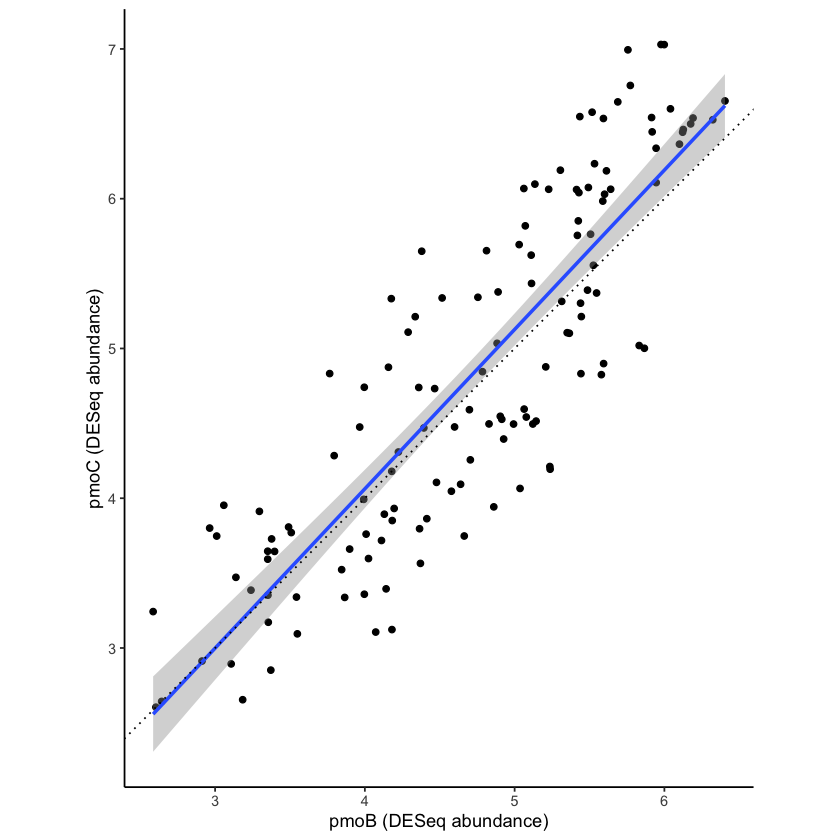

In [30]:
# pmoABC
# K10944, K10945, K10946
# K10944 pmoA is not in ko_table!!
ggplot(data = ko_table, aes(x = K10945, y = K10946)) +
    geom_point() +
    geom_smooth(method = "lm") +
    geom_abline(intercept = 0, slope = 1, linetype = "dotted") +
    labs(x = "pmoB (DESeq abundance)",
         y = "pmoC (DESeq abundance)") +
    coord_fixed() +
    theme_classic()

## Raw counts

In [46]:
# Check other KO tables for pmoA
ko_table <- read.delim("../data/shotgun/MG_RAST_data/MG_RAST_KO_counts133_revised.txt") %>%
    column_to_rownames(var = "X") %>%
    t() %>%
    as.data.frame()
dim(ko_table)
head(ko_table)
tail(ko_table)

[1]  134 6277

,K00001,K00002,K00003,K00004,K00005,K00007,K00008,K00009,K00010,K00011,⋯,K04141,K04818,K05009,K05029,K07971,K08491,K10056,K10886,K14037,K14490
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sandmound_TuleA_D1,5716,253,7024,98,353,76,1781,25,2221,289,⋯,0,0,0,0,0,0,0,0,0,0
Sandmound_TuleA_D2,4233,148,4949,77,274,43,1446,19,1586,200,⋯,0,0,0,0,0,0,0,0,0,0
Sandmound_TuleB_D1,4984,217,6132,90,332,80,1503,27,1928,259,⋯,0,0,0,0,0,0,0,0,0,0
Sandmound_TuleB_D2,4342,163,5150,80,303,66,1532,29,1620,212,⋯,0,0,0,0,0,0,0,0,0,0
Sandmound_TuleC_D1,4281,207,5151,80,208,68,1158,24,1663,212,⋯,0,0,0,0,0,0,0,0,0,0
Sandmound_TuleC_D2,3828,136,4209,73,238,73,1285,53,1428,175,⋯,0,0,0,0,0,0,0,0,0,0


,K00001,K00002,K00003,K00004,K00005,K00007,K00008,K00009,K00010,K00011,⋯,K04141,K04818,K05009,K05029,K07971,K08491,K10056,K10886,K14037,K14490
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Muzzi_PWA_D1,5110,216,5188,81,559,0,1478,74,1525,213,⋯,0,0,0,0,0,0,0,0,0,0
Muzzi_PWB_D1,4670,428,3756,57,252,4,877,51,1531,246,⋯,0,0,0,0,0,0,0,0,0,0
Muzzi_PWB_D2,5605,280,5238,82,420,1,1217,54,1482,194,⋯,0,0,0,0,0,0,0,0,0,0
Muzzi_PWC_D1,4662,203,5019,60,501,2,1157,80,1235,178,⋯,0,0,0,0,0,0,0,0,0,0
Muzzi_PWC_D2,4984,148,5300,78,421,1,1232,74,1373,206,⋯,0,0,0,0,0,0,0,0,0,0
KOsum,579204,25719,640153,9881,43654,3908,174939,6932,208377,32201,⋯,1,1,1,1,1,1,2,1,2,1


In [35]:
ko_table$K10944

[1]   1   2   0   0   1   0   1   0   0   0   0   2   0   0   0   0   0   0
 [19]   0   1   0   1   1   1   1   1   0   0   0   0   1   0   2   2   1   0
 [37]   0   0   1   0   5   0   2   1   1   1   0   1   1   1   2   1   2   1
 [55]   2   1   0   1   1   1   0   0   2   1   3   0   1   0   2   2   0   2
 [73]   0   0   0   0   1   2   0   0   4   1   0   0   1   0   1   1   0   1
 [91]   0   2   0   0   1   1   1   3   1   1   0   0   0   0   5   5   6   2
[109]   3   2   3   2   7   0   0   0   0   0   0   0   0   1   0   0   0   1
[127]   0   6   2   0   0   0   2 127

In [36]:
ko_table$K10945

[1]   85   71   71   47   60   46   57   62   48   77   37   56   28   20    7
 [16]   18   48   75   11   29   17   18   13    8   30   20   17   29    3    1
 [31]    8    3    7    3    4    4   14    3   19    0    9    3   22    4   10
 [46]   15   16   10   24    7   18   17   33    8   26   41   34   33   36   40
 [61]   51   24   31   34   24   55   15   27   37   25   25   37   11    2   10
 [76]    9   63   43   28   37   50   33   38   31   43   27   57    6   12   12
 [91]    9   31   33   13   17   15   12   10   37   24    1   10   12   14   20
[106]   38   44   29   35   37   46   36   31   14    2    1    4    5    0    0
[121]    3   12   27   29    1   25   13    6   28    3    4    2   12 3222

In [37]:
ko_table$K10946

[1]  109   83   92  122   77   75   90   81  103   93   78  125   10    7    5
 [16]   12   28   92    6   18    9   10   17    5   11   18   15   23    5    6
 [31]    3    2    5    5    1    6    5    3   13    3    5    8   13    7   11
 [46]   11   10   10    9    3   32   18   56   18   49   58   42   53   31   41
 [61]   58   50   41   56   37   83   48   20   52   50   58   51    2    4    6
 [76]   19   97  104   37   76   68   58   54   48   91   60  125   20    9   26
 [91]   16   72   27   29   29   22   28   31   37   17    1    2    6   10   23
[106]   35   22   16   19   19   22   32   25    5    0    6    6    2    0    0
[121]    4   13   10   16    5   15   13   11   18    2    6    1    8 4145

In [47]:
# Last row is sum:
# pmoA: 127
# pmoB: 3222
# pmoC: 4145
# Now remove sum row
ko_table <- ko_table[1:nrow(ko_table)-1,]

`geom_smooth()` using formula = 'y ~ x'


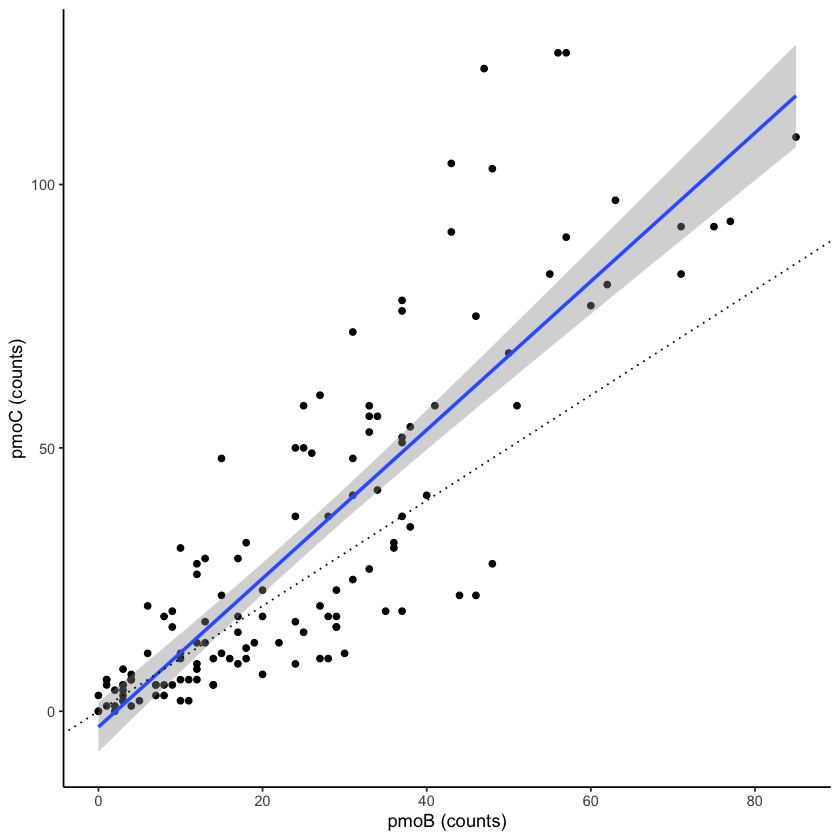

In [48]:
ggplot(data = ko_table, aes(x = K10945, y = K10946)) +
    geom_point() +
    geom_smooth(method = "lm") +
    geom_abline(intercept = 0, slope = 1, linetype = "dotted") +
    labs(x = "pmoB (counts)",
         y = "pmoC (counts)") +
    theme_classic()

`geom_smooth()` using formula = 'y ~ x'


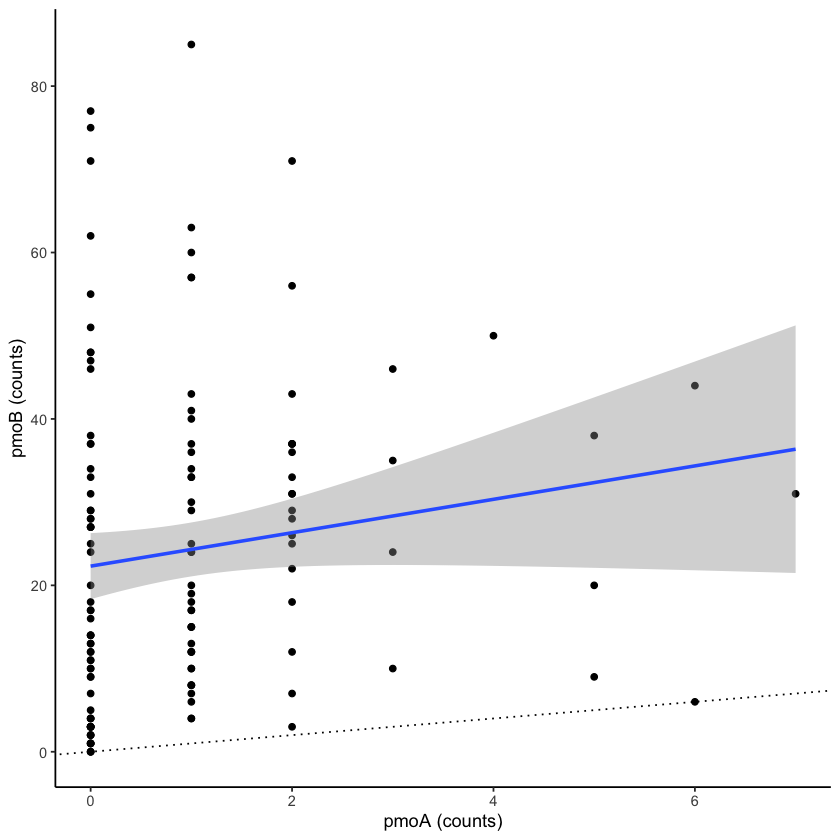

In [49]:
ggplot(data = ko_table, aes(x = K10944, y = K10945)) +
    geom_point() +
    geom_smooth(method = "lm") +
    geom_abline(intercept = 0, slope = 1, linetype = "dotted") +
    labs(x = "pmoA (counts)",
         y = "pmoB (counts)") +
    theme_classic()

`geom_smooth()` using formula = 'y ~ x'


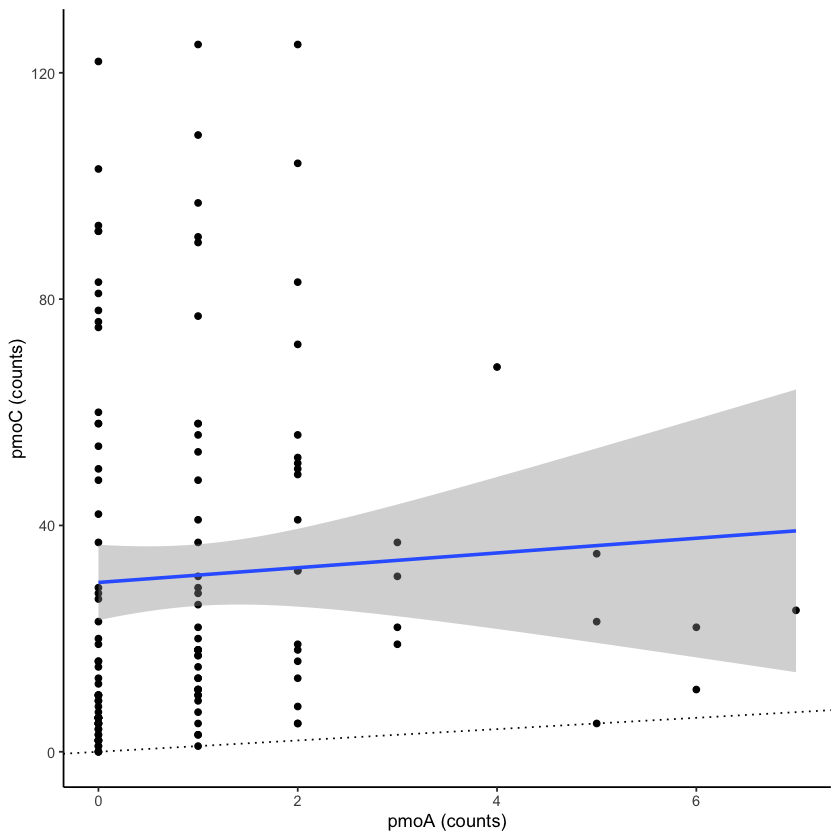

In [50]:
ggplot(data = ko_table, aes(x = K10944, y = K10946)) +
    geom_point() +
    geom_smooth(method = "lm") +
    geom_abline(intercept = 0, slope = 1, linetype = "dotted") +
    labs(x = "pmoA (counts)",
         y = "pmoC (counts)") +
    theme_classic()